# Tarea 1 Maria Fernanda Rodriguez Conde

Primero implementamos el codigo que genera los puntos aleatorios y los grafica para comenzar la resolucion de los problemas.

In [115]:
#Importamos librerias
import numpy as np
import matplotlib.pyplot as plt
import math

In [116]:
def createP(n):
    """
    Creamos la lista P que contiene n listas de puntos con coordenadas aleatorias y angulo 0
    """
    P=[]
    P_points=[]
    for i in range(n):
        x=np.random.randint(100, size=2)
        P.append(["P"+str(i), x[0] , x[1] , 0 ])
        P_points.append([ x[0] , x[1] ])
    return P, P_points

def graph_points(P):
    for i in P: 
        x_i=(i[1:3][0])
        y_i=(i[1:3][1])
        plt.plot(x_i, y_i, "ro") 
        plt.annotate(i[0], (x_i,y_i),(x_i + 0.01, y_i)) 

def graph_lines(L):
    for i in L: 
        xdata=[i[0][0],i[1][0]]
        ydata=[i[0][1],i[1][1]]
        plt.plot(xdata,ydata)   

def graph(P,L):
    graph_points(P)
    graph_lines(L)
    plt.show()

def orientacion(x0,y0,x1,y1,x2,y2):
    """
    Definimos la direccion de la linea 02 con respecto a la linea 01
    """
    return (x1-x0)*(y2-y0) - (y1 - y0)*(x2-x0)

def ensegmento(x1,y1,x2,y2,x3,y3):
    """
    Retorna True si el punto 1 se encuentra el la linea 23
    """
    x=False
    if (min(x2,x3) <= x1 <= max(x2,x3)) and (min(y2,y3) <= y1 <= max(y2,y3)):
        x=True
    return x

def intersec(x1,y1,x2,y2,x3,y3,x4,y4):  
    """
    Ingresamos las coordenadas de los extremos de las lineas 12 y 34
    retorna 0 si no se intersecan
    1 si se tocan alguno de sus extremos
    2 si se tocan en varios puntos
    3 si se tocan en un punto
    """
    d1=orientacion(x1,y1,x3,y3,x4,y4)
    d2=orientacion(x2,y2,x3,y3,x4,y4)
    d3=orientacion(x3,y3,x1,y1,x2,y2)
    d4=orientacion(x4,y4,x1,y1,x2,y2)
    
    result=0
    
    if d1*d2<0 and d3*d4<0:
        result=3
    elif (x3 == x1 and y3 == y1) or (x3 == x2 and y3 == y2) or (x4 == x1 and y4 == y1) or (x4 == x2 and y4 == y2):
        result=1
    elif d1==0 and d2==0 and d3==0 and d4==0:
        if ensegmento(x3,y3,x1,y1,x2,y2)==False and ensegmento(x4,y4,x1,y1,x2,y2)==False: 
            result=0
        else: 
            result=2
    elif d3==0 and d1*d2<=0: 
        result=3
    elif d1==0 and d3*d4<=0: 
        result=3
    elif d2==0 and d3*d4<=0: 
        result=3
    elif d4==0 and d1*d2<=0: 
        result=3
    else:
        result=0

    
    return result
    
def Pmin(P):
    """
    Retorna el punto minimo de la lista de puntos P
    """
    x=[]
    for i in range(len(P)):
        x.append(P[i][2])
    for i in P:
        if i[2]==min(x):
            return i

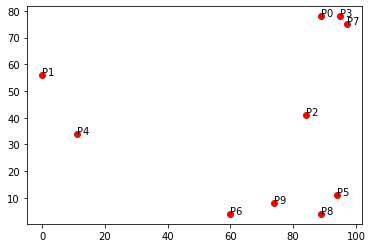

In [117]:
N=10
P0,points0=createP(N)
graph_points(P0) 

**Punto 1**

Write down a code able to identify whether a pair of segments share points.
Three possible answers should be available: segments do not intersect, segments do intersect giving the intersection point, and segments do intersect giving an intersection
interval. When two colinear segments share only one point, the algorithm should be able
to identify the shared endpoint.
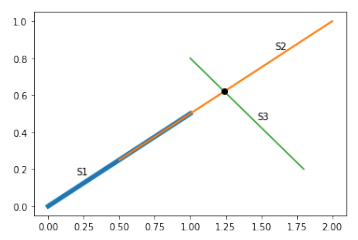

Creamos la lista de puntos tal como en el ejemplo

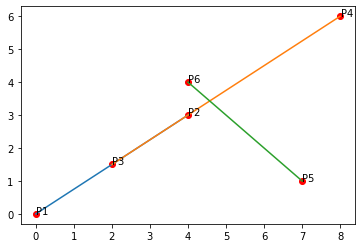

In [118]:
p1a = ['P1', 0, 0, 0]
p1b = ['P2', 4, 3, 0]
p2a = ['P3', 2, 1.5, 0]
p2b = ['P4', 8, 6, 0]
p3a = ['P5', 7, 1, 0]
p3b = ['P6', 4, 4, 0]

S = [p1a, p1b, p2a, p2b, p3a, p3b]

S1 = [S[0][1:3],S[1][1:3]]
S2 = [S[2][1:3],S[3][1:3]]
S3 = [S[4][1:3],S[5][1:3]]

lines0 = [S1, S2, S3]

graph(S,lines0)

Definimos la funcion *point_intersec*, la cual nos retorna el punto en el que se tocan las lineas 1_2 y 3_4

In [119]:
def point_intersec(x1,y1,x2,y2,x3,y3,x4,y4):
    
    if intersec(x1,y1,x2,y2,x3,y3,x4,y4) == 0: 
        print("Las lineas no se intersecan") 
    
    # Linea S1  a1x + b1y = c1
    a1 = y2 - y1
    b1 = x1 - x2
    c1 = a1*(x1) + b1*(y1)
 
    # Linea S2  a2x + b2y = c2
    a2 = y4 - y3
    b2 = x3 - x4
    c2 = a2*(x3) + b2*(y3)
 
    det = a1*b2 - a2*b1
    
    if intersec(x1,y1,x2,y2,x3,y3,x4,y4) == 1:
        if (x3 == x1 and y3 == y1) or (x3 == x2 and y3 == y2):
            print("Las lineas se intersecan en el punto ", [x3,y3])
        elif (x4 == x1 and y4 == y1) or (x4 == x2 and y4 == y2):
            print("Las lineas se intersecan en el punto ", [x4,y4])
    elif intersec(x1,y1,x2,y2,x3,y3,x4,y4) == 2:
        if ensegmento(x3,y3,x1,y1,x2,y2)==True and ensegmento(x2,y2,x3,y3,x4,y4)==True:
            print("Las lineas se intersecan en el intervalo ", [[x2,y2],[x3,y3]])
        elif ensegmento(x4,y4,x1,y1,x2,y2)==True and ensegmento(x2,y2,x3,y3,x4,y4)==True:
            print("Las lineas se intersecan en el intervalo ", [[x2,y2],[x4,y4]])
        elif ensegmento(x3,y3,x1,y1,x2,y2)==True and ensegmento(x1,y1,x3,y3,x4,y4)==True:
            print("Las lineas se intersecan en el intervalo ", [[x1,y1],[x3,y3]])
        elif ensegmento(x4,y4,x1,y1,x2,y2)==True and ensegmento(x1,y1,x3,y3,x4,y4)==True:
            print("Las lineas se intersecan en el intervalo ", [[x1,y1],[x4,y4]])
    elif intersec(x1,y1,x2,y2,x3,y3,x4,y4) == 3:
        x = (b2*c1 - b1*c2) / det
        y = (a1*c2 - a2*c1) / det
        print("Las lineas se intersecan en el punto ", [x,y])
    
    P1x, P1y = [x1,x2] , [y1,y2]
    P2x, P2y = [x3,x4] , [y3,y4]  
    
    plt.clf()
    plt.plot(x1,y1,"ro")
    plt.plot(x2,y2,"ro")
    plt.plot(x3,y3,"ro")
    plt.plot(x4,y4,"ro")
    plt.plot(P1x,P1y)
    plt.plot(P2x,P2y)
    plt.annotate("P1", (x1,y1),(x1 + 0.01, y1))
    plt.annotate("P2", (x2,y2),(x2 + 0.01, y2))
    plt.annotate("P3", (x3,y3),(x3 + 0.01, y3))
    plt.annotate("P4", (x4,y4),(x4 + 0.01, y4))
    plt.show()

Las lineas se intersecan en el intervalo  [[4, 3], [2, 1.5]]


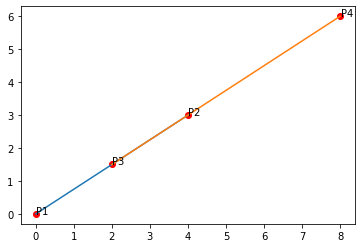

In [120]:
point_intersec(p1a[1], p1a[2], p1b[1], p1b[2], p2a[1], p2a[2], p2b[1], p2b[2])

Las lineas se intersecan en el punto  [4, 3]


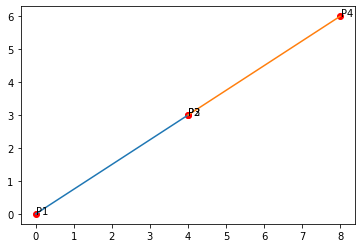

In [121]:
point_intersec(p1a[1], p1a[2], p1b[1], p1b[2], p1b[1], p1b[2], p2b[1], p2b[2])

Las lineas no se intersecan


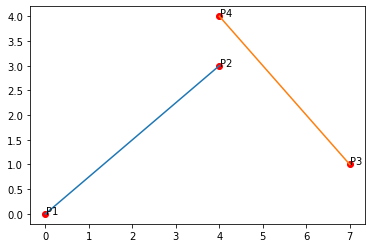

In [122]:
point_intersec(p1a[1], p1a[2], p1b[1], p1b[2], p3a[1], p3a[2], p3b[1], p3b[2])

Las lineas se intersecan en el punto  [4.571428571428571, 3.4285714285714284]


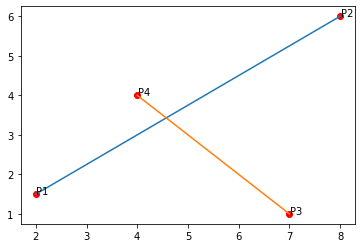

In [123]:
point_intersec(p2a[1], p2a[2], p2b[1], p2b[2], p3a[1], p3a[2], p3b[1], p3b[2])

**Punto 2**

Search for the divide and conquer algorithm for the construction of the
convex hull of a set of points.

* Implement the algoritm for 50 ramdomly genrated points. Illustrate the process.
* Which models could be implemented by the convex hull algorithm? Which systems
could be described by the model? In those cases, what do represent the points and
the hull?

**Respuestas**

* Los modelos que pueden ser implementados por este algoritmo son modelos que requieran una optimizacion del espacio teniendo en cuenta unos puntos ya previstos. Los problemas mas comunes son cuando tenemos objetos con puntas irregulares y queremos generar un empaque convexo que los contenga pero ahorre todo el espacio posible, para esto tenemos que las puntas del objeto son los puntos y el empaque es la envolvente convexa.

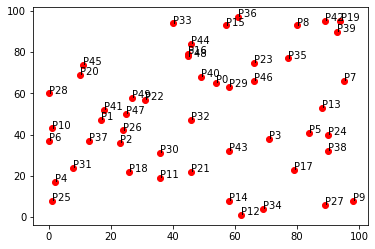

In [124]:
#Generamos los 50 puntos
N=50
P2,points2=createP(N)
graph_points(P2) 

Definimos la funcion que realiza la envolvente convexa usando divide y venceras. 
Codigo de apoyo tomado de: https://github.com/TheAlgorithms/Python/blob/4e4fe95369c15e62364f7d6a6bfc9464c1143dc6/divide_and_conquer/convex_hull.py#L222

In [125]:
def convex_hull(points):
    points = sorted(points)
    left = points[0]
    right = points[N-1]
    
    convex = [left,right]
    upper = []
    lower = []
    
    for i in range(1,N-1):
        dett = (left[0] * right[1] + right[0] * points[i][1] + points[i][0] * left[1]) - (left[1] * right[0] + right[1] * points[i][0] + points[i][1] * left[0])
        if dett > 0: 
            upper.append(points[i])
        elif dett < 0:
            lower.append(points[i])

    process(upper, left, right, convex)
    process(lower, right, left, convex)
    
    envolv = convex
    lines = []
    for i in range(len(envolv)-1): 
        lines.append([envolv[i],envolv[i+1]])
    lines.append([envolv[-1],envolv[0]])
    graph(P,lines)
    
    print(sorted(convex))
    
    envolv = sorted(convex)
    lines = []
    for i in range(len(envolv)-1): 
        lines.append([envolv[i],envolv[i+1]])
    lines.append([envolv[-1],envolv[0]])
    graph(P,lines)
    
    return convex

def process(points, left, right, conjunto):
    if points: 
        extremo = float("-inf")
        p_extremo = None
        candidatos = []
        
    for p in points:
        
        dett = (left[0] * right[1] + right[0] * p[1] + p[0] * left[1]) - (left[1] * right[0] + right[1] * p[0] + p[1] * left[0])
        if dett > 0: 
            candidatos.append(p)
            if dett > extremo:
                extremo = dett
                p_extremo = p
            
    if p_extremo: 
        process(candidatos, left, p_extremo, conjunto)
        conjunto.append(p_extremo)
        process(candidatos, p_extremo, right, conjunto) 
        
    envolv = conjunto
    lines = []
    for i in range(len(envolv)-1): 
        lines.append([envolv[i],envolv[i+1]]) 
    lines.append([envolv[-1],envolv[0]])
    graph(P,lines)

Observamos el paso a paso del algoritmo que va generando el convex hull.
Al final tenemos dos resultados en el grafico de convex hull, el paso a paso sin sorted y el resultado con sorted, no se llega a apreciar el convex hull con la segunda opcion y en la primera nos muestra un error en la conexion de puntos.

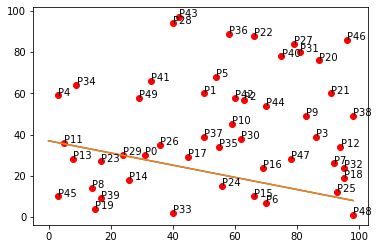

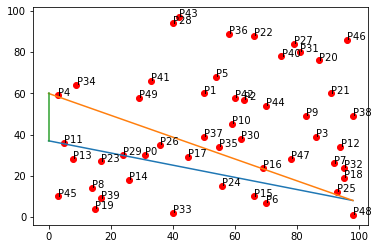

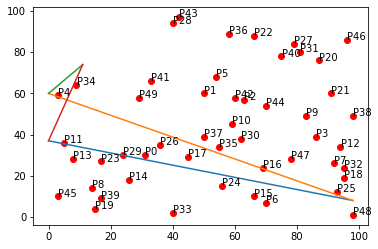

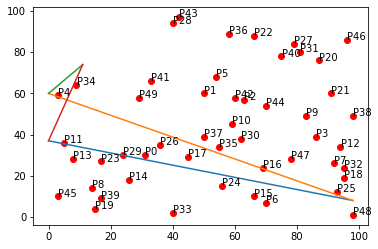

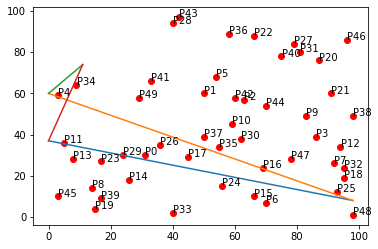

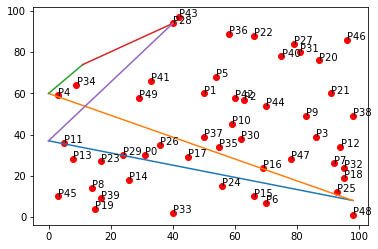

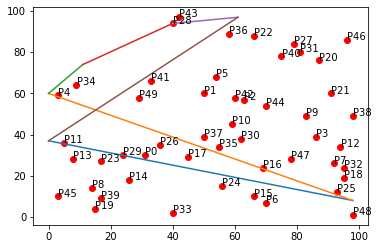

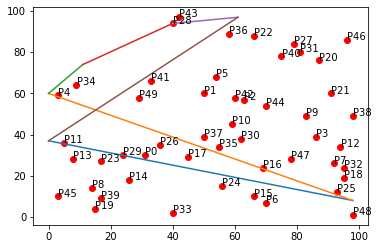

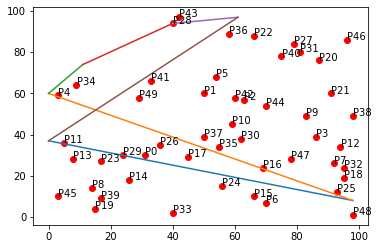

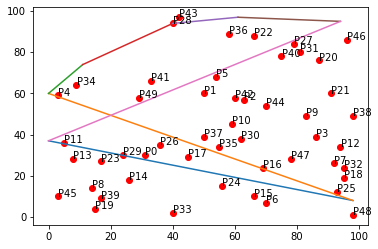

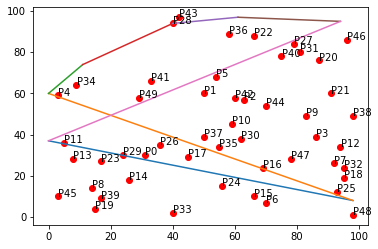

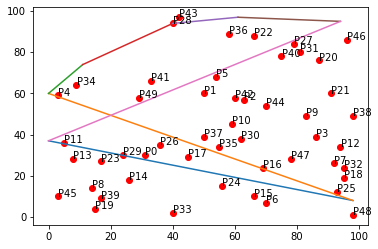

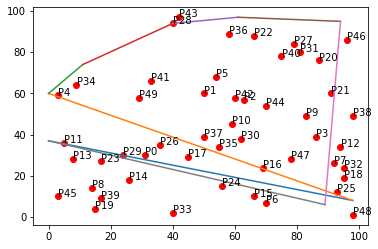

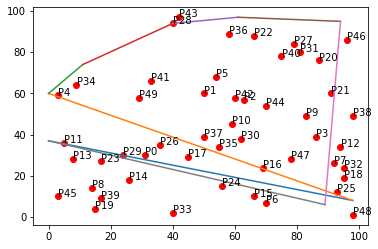

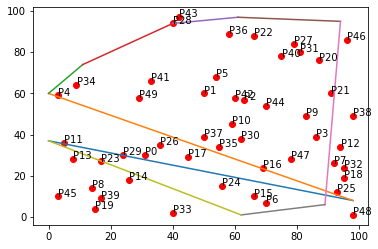

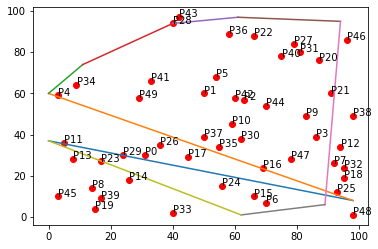

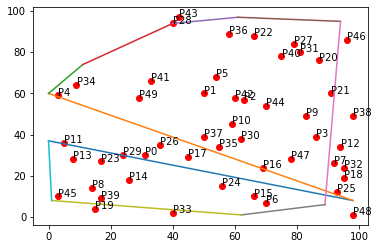

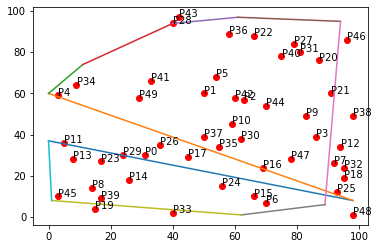

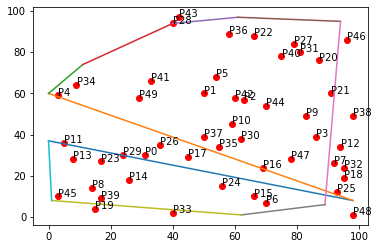

[[0, 37], [0, 60], [1, 8], [11, 74], [40, 94], [61, 97], [62, 1], [89, 6], [94, 95], [98, 8]]


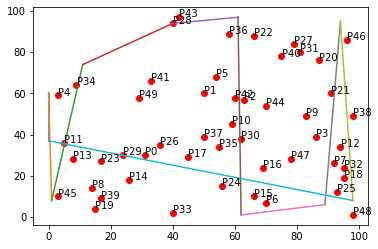

[[0, 37], [98, 8], [0, 60], [11, 74], [40, 94], [61, 97], [94, 95], [89, 6], [62, 1], [1, 8]]
[[[0, 37], [98, 8]], [[98, 8], [0, 60]], [[0, 60], [11, 74]], [[11, 74], [40, 94]], [[40, 94], [61, 97]], [[61, 97], [94, 95]], [[94, 95], [89, 6]], [[89, 6], [62, 1]], [[62, 1], [1, 8]], [[1, 8], [0, 37]]]


In [126]:
envol2 = convex_hull(points2)
print(envol2)
lines2 = []
for i in range(len(envol2)-1): 
    lines2.append([envol2[i],envol2[i+1]])
lines2.append([envol2[-1],envol2[0]])
print(lines2)

In [127]:
lines2

[[[0, 37], [98, 8]],
 [[98, 8], [0, 60]],
 [[0, 60], [11, 74]],
 [[11, 74], [40, 94]],
 [[40, 94], [61, 97]],
 [[61, 97], [94, 95]],
 [[94, 95], [89, 6]],
 [[89, 6], [62, 1]],
 [[62, 1], [1, 8]],
 [[1, 8], [0, 37]]]

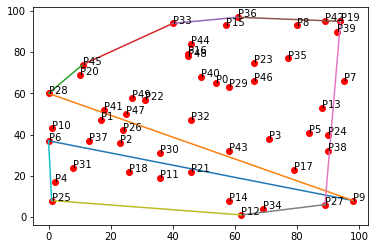

In [128]:
graph(P2, lines2)

**Punto 2**

Implement the sweep line algorithm and apply it to a set of 20 randomly
generated segments to identify intersection points and intersecting segments.

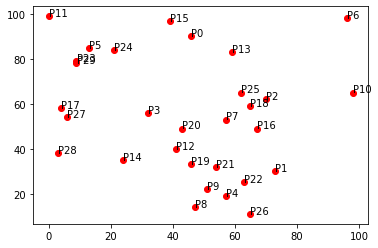

In [129]:
#Generamos 30 puntos
N=30
P30,points30=createP(N)
graph_points(P30) 

In [130]:
def create_lines(P,n):
    """
    Creamos n lineas aleatorias
    """
    lines = []
    for i in range(n):
        a=np.random.randint(0,N)
        b=np.random.randint(0,N) 
        lines.append([P[a][1:3],P[b][1:3]]) 
    return lines

In [131]:
lineas = create_lines(P30,20)

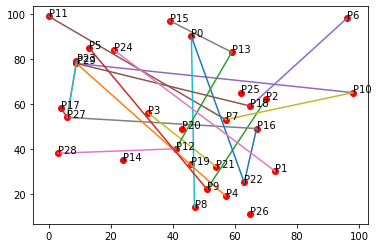

In [132]:
graph(P30,lineas)

In [133]:
def point_intersec2(x1,y1,x2,y2,x3,y3,x4,y4):
    
    if intersec(x1,y1,x2,y2,x3,y3,x4,y4) == 0: 
        print("Las lineas no se intersecan") 
    
    # Linea S1  a1x + b1y = c1
    a1 = y2 - y1
    b1 = x1 - x2
    c1 = a1*(x1) + b1*(y1)
 
    # Linea S2  a2x + b2y = c2
    a2 = y4 - y3
    b2 = x3 - x4
    c2 = a2*(x3) + b2*(y3)
 
    det = a1*b2 - a2*b1
    
    if intersec(x1,y1,x2,y2,x3,y3,x4,y4) == 1:
        if (x3 == x1 and y3 == y1) or (x3 == x2 and y3 == y2): 
            return [x3,y3]
        elif (x4 == x1 and y4 == y1) or (x4 == x2 and y4 == y2): 
            return [x4,y4]
    elif intersec(x1,y1,x2,y2,x3,y3,x4,y4) == 2:
        if ensegmento(x3,y3,x1,y1,x2,y2)==True and ensegmento(x2,y2,x3,y3,x4,y4)==True: 
            return [[x2,y2],[x3,y3]]
        elif ensegmento(x4,y4,x1,y1,x2,y2)==True and ensegmento(x2,y2,x3,y3,x4,y4)==True: 
            return [[x2,y2],[x4,y4]]
        elif ensegmento(x3,y3,x1,y1,x2,y2)==True and ensegmento(x1,y1,x3,y3,x4,y4)==True: 
            return [[x1,y1],[x3,y3]]
        elif ensegmento(x4,y4,x1,y1,x2,y2)==True and ensegmento(x1,y1,x3,y3,x4,y4)==True: 
            return [[x1,y1],[x4,y4]]
    elif intersec(x1,y1,x2,y2,x3,y3,x4,y4) == 3:
        x = (b2*c1 - b1*c2) / det
        y = (a1*c2 - a2*c1) / det 
        return [x,y] 

In [134]:
points = []
for i in lineas:
    for j in lineas:
        if intersec(i[0][0],i[0][1],i[1][0],i[1][1],j[0][0],j[0][1],j[1][0],j[1][1]) == 2:
            lineas.append(point_intersec2(i[0][0],i[0][1],i[1][0],i[1][1],j[0][0],j[0][1],j[1][0],j[1][1]))
        elif intersec(i[0][0],i[0][1],i[1][0],i[1][1],j[0][0],j[0][1],j[1][0],j[1][1]) != 0:
            points.append(point_intersec2(i[0][0],i[0][1],i[1][0],i[1][1],j[0][0],j[0][1],j[1][0],j[1][1]))

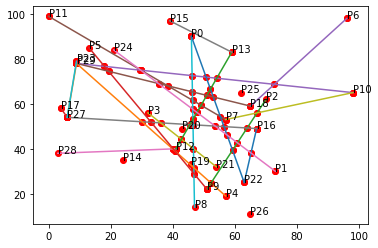

In [135]:
for i in points: 
    x_i=(i[0])
    y_i=(i[1])
    plt.plot(x_i, y_i, "ro")   
graph(P30,lineas)
plt.show()